<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Doğrusal-Modelleme-Uygulamalar" data-toc-modified-id="Doğrusal-Modelleme-Uygulamalar-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Doğrusal Modelleme Uygulamalar</a></span><ul class="toc-item"><li><span><a href="#Gepettonun-Atölyesi" data-toc-modified-id="Gepettonun-Atölyesi-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Gepettonun Atölyesi</a></span></li><li><span><a href="#Posta-Ofisi-Problemi--1" data-toc-modified-id="Posta-Ofisi-Problemi--1-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Posta Ofisi Problemi -1</a></span></li><li><span><a href="#Posta-Ofisi-Problemi---2" data-toc-modified-id="Posta-Ofisi-Problemi---2-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Posta Ofisi Problemi - 2</a></span></li><li><span><a href="#Finans-Bütçeleme-Problemi" data-toc-modified-id="Finans-Bütçeleme-Problemi-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Finans Bütçeleme Problemi</a></span></li><li><span><a href="#Karışım-Problemi" data-toc-modified-id="Karışım-Problemi-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Karışım Problemi</a></span></li><li><span><a href="#Üretim-Proses-Modellemesi" data-toc-modified-id="Üretim-Proses-Modellemesi-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Üretim Proses Modellemesi</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from pyomo.environ import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Doğrusal Modelleme Uygulamalar

## Gepettonun Atölyesi

In [33]:
Ürün ={ 'Asker' : {'Haftalık  Maksimum Talep':40,'Satış Fiyatı':27,'Hammadde Maliyeti':10,'İşçilik Maliyeti':14,'Doğrama':1,'Bitirme':2 },
      'Tren'   : {'Haftalık  Maksimum Talep':999999,'Satış Fiyatı':21,'Hammadde Maliyeti':9,'İşçilik Maliyeti':10,'Doğrama':1,'Bitirme':1 }}

doğrama=80
bitirme=100

m = ConcreteModel()

m.değişken = Var(Ürün.keys() , domain=NonNegativeIntegers)


m.değişken.pprint()

satış = sum(m.değişken[u]*Ürün[u]['Satış Fiyatı'] for  u in Ürün.keys())
hammadde = sum(m.değişken[u]*Ürün[u]['Hammadde Maliyeti'] for  u in Ürün.keys())
işçilik= sum(m.değişken[u]*Ürün[u]['İşçilik Maliyeti'] for  u in Ürün.keys())

m.amaç = Objective(expr = satış-hammadde-işçilik, sense=maximize)

m.kısıtlar = ConstraintList()

m.kısıtlar.add(sum(m.değişken[u]*Ürün[u]['Doğrama'] for  u in Ürün.keys())   <= doğrama)
m.kısıtlar.add(sum(m.değişken[u]*Ürün[u]['Bitirme'] for  u in Ürün.keys())   <= bitirme)
m.kısıtlar.add( m.değişken['Asker']- Ürün['Asker']['Haftalık  Maksimum Talep']   <= 0)        


m.pprint()

SolverFactory('cbc').solve(m).write()


print('satış:' ,satış() ,'hammadde :',hammadde(),'işçilik :',işçilik() ,'amaç :', m.amaç())

for u in Ürün.keys():
        print(u,m.değişken[u]())


değişken : Size=2, Index=değişken_index
    Key   : Lower : Value : Upper : Fixed : Stale : Domain
    Asker :     0 :  None :  None : False :  True : NonNegativeIntegers
     Tren :     0 :  None :  None : False :  True : NonNegativeIntegers
2 Set Declarations
    değişken_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'Asker', 'Tren'}
    kısıtlar_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {1, 2, 3}

1 Var Declarations
    değişken : Size=2, Index=değişken_index
        Key   : Lower : Value : Upper : Fixed : Stale : Domain
        Asker :     0 :  None :  None : False :  True : NonNegativeIntegers
         Tren :     0 :  None :  None : False :  True : NonNegativeIntegers

1 Objective Declarations
    amaç : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximi

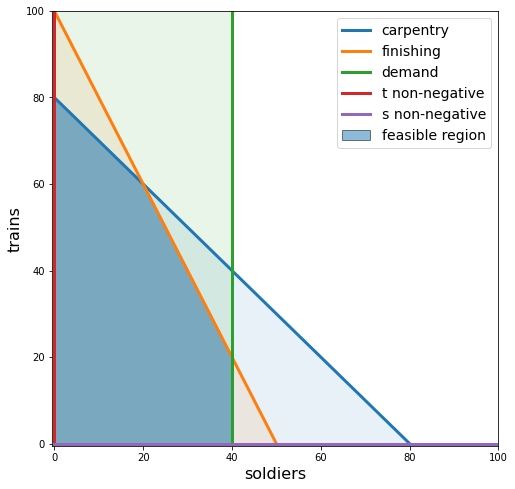

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# use seaborn to change the default graphics to something nicer
# and set a nice color palette
import seaborn as sns
#sns.set_color_palette('Set1')

# create the plot object
fig, ax = plt.subplots(figsize=(8, 8))
s = np.linspace(0, 100)

# add carpentry constraint: trains <= 80 - soldiers
plt.plot(s, 80 - s, lw=3, label='carpentry')
plt.fill_between(s, 0, 80 - s, alpha=0.1)

# add finishing constraint: trains <= 100 - 2*soldiers
plt.plot(s, 100 - 2 * s, lw=3, label='finishing')
plt.fill_between(s, 0, 100 - 2 * s, alpha=0.1)

# add demains constraint: soldiers <= 40
plt.plot(40 * np.ones_like(s), s, lw=3, label='demand')
plt.fill_betweenx(s, 0, 40, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(s), s, lw=3, label='t non-negative')
plt.plot(s, np.zeros_like(s), lw=3, label='s non-negative')

# highlight the feasible region
path = Path([
    (0., 0.),
    (0., 80.),
    (20., 60.),
    (40., 20.),
    (40., 0.),
    (0., 0.),
])
patch = PathPatch(path, label='feasible region', alpha=0.5)
ax.add_patch(patch)

# labels and stuff
plt.xlabel('soldiers', fontsize=16)
plt.ylabel('trains', fontsize=16)
plt.xlim(-0.5, 100)
plt.ylim(-0.5, 100)
plt.legend(fontsize=14)
plt.show()

# Source https://www.isaacslavitt.com/posts/linear-optimization-in-python/

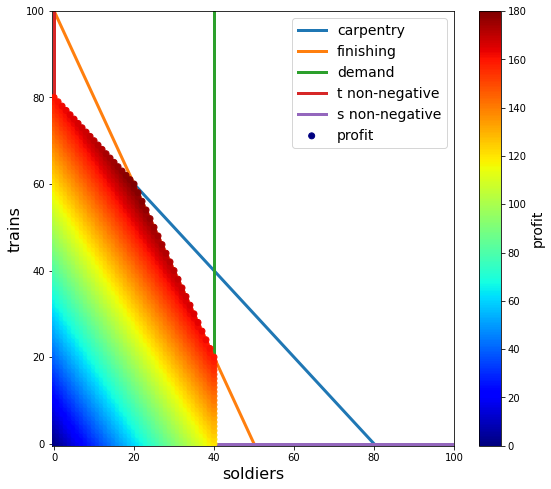

In [3]:
fig, ax = plt.subplots(figsize=(9, 8))
s = np.linspace(0, 100)

# plot the constraints again
plt.plot(s, 80 - s, lw=3, label='carpentry')
plt.plot(s, 100 - 2 * s, lw=3, label='finishing')
plt.plot(40 * np.ones_like(s), s, lw=3, label='demand')
plt.plot(np.zeros_like(s), s, lw=3, label='t non-negative')
plt.plot(s, np.zeros_like(s), lw=3, label='s non-negative')

# plot the possible (s, t) pairs
pairs = [(s, t) for s in np.arange(101)
                for t in np.arange(101)
                if (s + t) <= 80
                and (2 * s + t) <= 100
                and s <= 40]

# split these into our variables
ss, ts = np.hsplit(np.array(pairs), 2)

# caculate the objective function at each pair
z = 3*ss + 2*ts  # the objective function

# plot the results
plt.scatter(ss, ts, c=z, cmap='jet', label='profit', zorder=3)

# labels and stuff
cb = plt.colorbar()
cb.set_label('profit', fontsize=14)
plt.xlabel('soldiers', fontsize=16)
plt.ylabel('trains', fontsize=16)
plt.xlim(-0.5, 100)
plt.ylim(-0.5, 100)
plt.legend(fontsize=14)
plt.show()

plt.show()

# Source https://www.isaacslavitt.com/posts/linear-optimization-in-python/

## Posta Ofisi Problemi -1

In [10]:
İhtiyac=pd.DataFrame([['Pazartesi',17],['Salı',13],['Çarşamba',15],['Perşembe',19],['Cuma',14],['Cumartesi',16],['Pazar',11]],columns=['Gün','Çalışan İhtiyacı']);İhtiyac

,Gün,Çalışan İhtiyacı
0,Pazartesi,17
1,Salı,13
2,Çarşamba,15
3,Perşembe,19
4,Cuma,14
5,Cumartesi,16
6,Pazar,11


In [36]:

model = ConcreteModel()

# Değişken
model.Pazartesi = Var(domain=PositiveIntegers)
model.Salı = Var(domain=PositiveIntegers)
model.Çarşamba = Var(domain=PositiveIntegers)
model.Perşembe = Var(domain=PositiveIntegers)
model.Cuma = Var(domain=PositiveIntegers)
model.Cumartesi = Var(domain=PositiveIntegers)
model.Pazar = Var(domain=PositiveIntegers)

# Hedef
model.Çalışan = Objective(expr = model.Pazartesi + model.Salı + model.Çarşamba + model.Perşembe  + model.Cuma + model.Cumartesi + model.Pazar , sense=minimize)

# Kısıtlar
model.İhtiyacPazartesi = Constraint(expr = model.Pazartesi + model.Perşembe  + model.Cuma + model.Cumartesi + model.Pazar  >= 17)
model.İhtiyacSalı = Constraint(expr =     model.Pazartesi + model.Salı  + model.Cuma + model.Cumartesi + model.Pazar >= 13)
model.İhtiyacÇarşamba = Constraint(expr = model.Pazartesi + model.Salı + model.Çarşamba + model.Cumartesi + model.Pazar >= 15)
model.İhtiyacPerşembe = Constraint(expr = model.Pazartesi + model.Salı + model.Çarşamba + model.Perşembe + model.Pazar >= 19)
model.İhtiyacCuma = Constraint(expr =     model.Pazartesi + model.Salı + model.Çarşamba + model.Perşembe  + model.Cuma >=14)
model.İhtiyacCumartesi = Constraint(expr = model.Salı + model.Çarşamba + model.Perşembe  + model.Cuma + model.Cumartesi   >= 16)
model.İhtiyacPazar = Constraint(expr = model.Çarşamba + model.Perşembe  + model.Cuma + model.Cumartesi + model.Pazar  >= 11)

model.pprint()

SolverFactory('cbc').solve(model).write()


print('\nAmaç')
print('Çalışan = ', model.Çalışan())

print('\nDeğişkenler')

print('Pazartesi  = ', model.Pazartesi())
print('Salı  = ', model.Salı())
print('Çarşamba  = ', model.Çarşamba())
print('Perşembe  = ',  model.Perşembe())
print('Cuma  = ',  model.Cuma())
print('Cumartesi  = ',   model.Cumartesi())
print('Pazar  = ',   model.Pazar())


7 Var Declarations
    Cuma : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Cumartesi : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Pazar : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Pazartesi : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Perşembe : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    Salı : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True :

## Posta Ofisi Problemi - 2

In [43]:
veri={'tam_zamanlı':{
       'değişkenler':{
            'pazartesi':17,
            'salı':13,
            'çarşamba':15,
            'perşembe':19,
            'cuma' :14,
            'cumartesi':16,
            'pazar':11},
        'maliyet':15,
    },
    'yarı_zamanlı':{
        'değişkenler':{
            'pazartesi':17,
            'salı':13,
            'çarşamba':15,
            'perşembe':19,
            'cuma' :14,
            'cumartesi':16,
            'pazar':11},
        'maliyet':10}}

In [44]:
veri.keys()

dict_keys(['tam_zamanlı', 'yarı_zamanlı'])

In [45]:
veri={'tam_zamanlı':{
       'değişkenler':{
            'pazartesi':17,
            'salı':13,
            'çarşamba':15,
            'perşembe':19,
            'cuma' :14,
            'cumartesi':16,
            'pazar':11},
        'maliyet':15,
    },
    'yarı_zamanlı':{
        'değişkenler':{
            'pazartesi':17,
            'salı':13,
            'çarşamba':15,
            'perşembe':19,
            'cuma' :14,
            'cumartesi':16,
            'pazar':11},
        'maliyet':10}}
        
günlük_saat=8
yarı_zamanlı_oranı=0.25

T = veri.get('tam_zamanlı').get('değişkenler').keys()
Y = veri.get('yarı_zamanlı').get('değişkenler').keys()
K= veri.get('tam_zamanlı').get('değişkenler')

model = ConcreteModel()

model.t= Var(T, domain=PositiveIntegers)
model.y= Var(Y, domain=PositiveIntegers)

model.maliyet=Objective(expr = sum(model.t[c]*15*8 + model.y[c]*10*4 for c in T))

model.sendika=Constraint(expr = 5*4*sum(model.y[c] for c in Y)-sum(K[gün]*8 for gün in K)/4<=0)

model.İhtiyacPazartesi = Constraint(expr = 8 * (model.t['pazartesi'] + model.t['pazar'] +model.t['cumartesi'] +model.t['cuma'] +model.t['perşembe']) +\
             4 * ( model.y['pazartesi'] + model.y['pazar'] + model.y['cumartesi'] + model.y['cuma'] + model.y['perşembe'] )  >= K['pazartesi']*günlük_saat)
model.İhtiyacSalı = Constraint(expr = 8*(model.t['salı'] + model.t['pazartesi'] +model.t['pazar'] +model.t['cumartesi'] +model.t['cuma']) + \
            4 * (model.y['salı'] + model.y['pazartesi'] +model.y['pazar'] +model.y['cumartesi'] +model.y['cuma'])  >= K['salı']*günlük_saat)
model.İhtiyacÇarşamba = Constraint(expr = 8*(model.t['çarşamba'] + model.t['salı'] +model.t['pazartesi'] +model.t['pazar'] +model.t['cumartesi']) + \
            4 * (model.y['çarşamba'] + model.y['salı'] +model.y['pazartesi'] +model.y['pazar'] +model.y['cumartesi'])  >= K['çarşamba']*günlük_saat)
model.İhtiyacPerşembe = Constraint(expr = 8*(model.t['perşembe'] + model.t['çarşamba'] +model.t['salı'] +model.t['pazartesi'] +model.t['pazar']) + \
            4 * (model.y['perşembe'] + model.y['çarşamba'] +model.y['salı'] +model.y['pazartesi'] +model.y['pazar'])  >= K['perşembe']*günlük_saat)
model.İhtiyacCuma = Constraint(expr = 8*(model.t['cuma']+model.t['perşembe'] + model.t['çarşamba'] +model.t['salı'] +model.t['pazartesi'] ) + \
            4 * (model.y['cuma']+model.y['perşembe'] + model.y['çarşamba'] +model.y['salı'] +model.y['pazartesi'] )  >= K['cuma']*günlük_saat)
model.İhtiyacCumartesi = Constraint(expr = 8*(model.t['cumartesi']+model.t['cuma']+model.t['perşembe'] + model.t['çarşamba'] +model.t['salı']  ) + \
            4 * (model.y['cumartesi'] +model.y['cuma']+model.y['perşembe'] + model.y['çarşamba'] +model.y['salı'] )  >= K['cumartesi']*günlük_saat)
model.İhtiyacPazar = Constraint(expr = 8*( model.t['pazar'] + model.t['cumartesi']+model.t['cuma']+model.t['perşembe'] + model.t['çarşamba']) + \
            4 * ( model.t['pazar'] + model.y['cumartesi'] +model.y['cuma']+model.y['perşembe'] + model.y['çarşamba'] )  >= K['pazar']*günlük_saat)
 
model.pprint()

SolverFactory('cbc').solve(model).write()

print('\nAmaç')
print('Maliyet = ', model.maliyet())

print('\nDeğişkenler')

print('Tam zamanlı',model.t.get_values())
print('Yarı zamanlı',model.y.get_values())
    

2 Set Declarations
    t_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    7 : {'cuma', 'cumartesi', 'pazar', 'pazartesi', 'perşembe', 'salı', 'çarşamba'}
    y_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    7 : {'cuma', 'cumartesi', 'pazar', 'pazartesi', 'perşembe', 'salı', 'çarşamba'}

2 Var Declarations
    t : Size=7, Index=t_index
        Key       : Lower : Value : Upper : Fixed : Stale : Domain
             cuma :     1 :  None :  None : False :  True : PositiveIntegers
        cumartesi :     1 :  None :  None : False :  True : PositiveIntegers
            pazar :     1 :  None :  None : False :  True : PositiveIntegers
        pazartesi :     1 :  None :  None : False :  True : PositiveIntegers
         perşembe :     1 :  None :  None : False :  True : PositiveIntegers
             salı :     1 :  None :  None : False :  True :

## Finans Bütçeleme Problemi

In [16]:
def net_değer_hesaplama(değer,faiz,zaman):
    return  değer/((1+faiz)**zaman)
    

In [46]:
data={ 1:-400,
    2:200,
    3:600,
    4:-900,
    5:1000,
    6:250,
      7:230}

faiz=0.15

genel_toplam=0
for i in data.keys():
    genel_toplam+=net_değer_hesaplama(data.get(i),faiz,i)

print('yıl sonu',round(genel_toplam,2))


genel_toplam=0
for i in data.keys():
    genel_toplam+=net_değer_hesaplama(data.get(i),faiz,i-1)
    
print('başlangıç',round(genel_toplam,2))


genel_toplam=0
for i in data.keys():
    genel_toplam+=net_değer_hesaplama(data.get(i),faiz,i-0.5)
    
print('yıl ortası',round(genel_toplam,2))

yıl sonu 375.06
başlangıç 431.32
yıl ortası 402.21


In [19]:
nakit_akışı=pd.DataFrame([[0,11, 53, 5 ,5 ,29],[  1 , 3, 6, 5 ,1, 34],['NPV', 13 ,16 ,16, 14 ,39]],columns=['Zaman',1,2,3,4,5])
nakit_akışı.set_index('Zaman',inplace=True);nakit_akışı

,1,2,3,4,5
Zaman,,,,,
0,11,53,5,5,29
1,3,6,5,1,34
NPV,13,16,16,14,39


In [20]:
model = ConcreteModel()

model.y1 = Var(domain=NonNegativeReals)
model.y2 = Var(domain=NonNegativeReals)
model.y3 = Var(domain=NonNegativeReals)
model.y4 = Var(domain=NonNegativeReals)
model.y5 = Var(domain=NonNegativeReals)

model.kazanç = Objective(expr = model.y1*13 + model.y2*16 +model.y3*16+ model.y4*14 +model.y5*39, sense=maximize)


model.zaman_0=Constraint(expr = model.y1*11+model.y2*53+model.y3*5+model.y4*5+model.y5*34 <= 40 )
model.zaman_1=Constraint(expr = model.y1*3+model.y2*6+model.y3*5+model.y4*1+model.y5*29 <= 20 )

model.y1_1=Constraint(expr = model.y1<=1 )
model.y2_1=Constraint(expr = model.y2<=1 )
model.y3_1=Constraint(expr = model.y3<=1 )
model.y4_1=Constraint(expr = model.y4<=1 )
model.y5_1=Constraint(expr = model.y5<=1 )

model.pprint()


SolverFactory('cbc').solve(model).write()

5 Var Declarations
    y1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    kazanç : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 13*y1 + 16*y2 + 16*

In [21]:
model.kazanç()

58.84621164

## Karışım Problemi

In [5]:
ürün={ 'normal' : {'talep':9.8,'fiyat':29.49,'kurşun':.15,'kurşun temizliği':8.5,'FCG':.38,'RON': 90,  'RVP':21.18 , 'ASTM 70 C':10 , 'ASTM 130 C' :50},
      'premium' : {'talep':30,'fiyat':31.43,'kurşun':.15,'kurşun temizliği':8.5,'FCG':.38,'RON': 30 ,  'RVP':21.18 , 'ASTM 70 C':10 , 'ASTM 130 C' :50}}


hammadde={'reformat gazı':{ 'Bulunabilirlik':15572 ,'RON': 98.9 ,  'RVP':7.66 , 'ASTM 70 C':-5 , 'ASTM 130 C' :46  } ,
                      'FCG':{ 'Bulunabilirlik':15434 ,'RON': 93.2 ,  'RVP':9.78 , 'ASTM 70 C':57, 'ASTM 130 C' :103  } ,
                      'ISO':{ 'Bulunabilirlik':6709 ,'RON': 86.1 ,  'RVP':29.52 , 'ASTM 70 C':107 , 'ASTM 130 C' :100 } ,
                      'POL': { 'Bulunabilirlik':1190 ,'RON': 97 ,  'RVP':14.51 , 'ASTM 70 C':7 , 'ASTM 130 C' :73  } ,
                       'MTB':{ 'Bulunabilirlik':748 ,'RON': 117 ,  'RVP':13.45 , 'ASTM 70 C':98 , 'ASTM 130 C' :100  } ,
                       'BUT': { 'Bulunabilirlik': 10^999 ,'RON': 98,  'RVP':166.99 , 'ASTM 70 C':130 , 'ASTM 130 C' :100  } ,
         }



m = ConcreteModel()
üretim = ürün.keys()
sarf =hammadde.keys()

m.değişken = Var(üretim,sarf, domain=NonNegativeReals)

m.değişken.pprint()

kazanç = sum(sum(m.değişken[u,h] for h in sarf )*0.85*ürün[u]['fiyat'] for  u in üretim)
maliyet = sum(sum(m.değişken[u,h] for h in sarf )*((ürün[u]['kurşun temizliği']*0.15)/.1) for  u in üretim)

m.amaç = Objective(expr = kazanç-maliyet, sense=maximize)

m.kısıtlar = ConstraintList()

for u in üretim:
        m.kısıtlar.add(ürün[u]['talep']-sum(m.değişken[u,h] for h in sarf )*0.85 == 0)
        m.kısıtlar.add(sum(m.değişken[u,h] for h in sarf)*ürün[u]['RON']-sum(m.değişken[u,h]*hammadde[h]['RON'] for h in sarf)   <= 0)
        m.kısıtlar.add(sum(m.değişken[u,h] for h in sarf)*ürün[u]['ASTM 70 C']-sum(m.değişken[u,h]*hammadde[h]['ASTM 70 C'] for h in sarf)   <= 0)
        m.kısıtlar.add(sum(m.değişken[u,h] for h in sarf)*ürün[u]['ASTM 130 C']-sum(m.değişken[u,h]*hammadde[h]['ASTM 130 C'] for h in sarf)   <= 0)
        m.kısıtlar.add(sum(m.değişken[u,h] for h in sarf)*ürün[u]['RVP']-sum(m.değişken[u,h]*hammadde[h]['RVP'] for h in sarf)   >= 0)
        m.kısıtlar.add(sum(m.değişken[u,h] for h in sarf)*ürün[u]['FCG']-m.değişken[u,'FCG'] >= 0)


for h in sarf:
        m.kısıtlar.add( sum(m.değişken[u,h] for u in üretim) <= hammadde[h]['Bulunabilirlik'])


m.pprint()

SolverFactory('cbc').solve(m).write()


print('kazanç:' ,kazanç() ,'maliyet :',maliyet() ,'amaç :', m.amaç())

for u in üretim:
    for h in sarf:
        print(u,h,m.değişken[u,h]())


değişken : Size=12, Index=değişken_index
    Key                          : Lower : Value : Upper : Fixed : Stale : Domain
               ('normal', 'BUT') :     0 :  None :  None : False :  True : NonNegativeReals
               ('normal', 'FCG') :     0 :  None :  None : False :  True : NonNegativeReals
               ('normal', 'ISO') :     0 :  None :  None : False :  True : NonNegativeReals
               ('normal', 'MTB') :     0 :  None :  None : False :  True : NonNegativeReals
               ('normal', 'POL') :     0 :  None :  None : False :  True : NonNegativeReals
     ('normal', 'reformat gazı') :     0 :  None :  None : False :  True : NonNegativeReals
              ('premium', 'BUT') :     0 :  None :  None : False :  True : NonNegativeReals
              ('premium', 'FCG') :     0 :  None :  None : False :  True : NonNegativeReals
              ('premium', 'ISO') :     0 :  None :  None : False :  True : NonNegativeReals
              ('premium', 'MTB') :     0 :  None 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -634.902
  Upper bound: -634.902
  Number of objectives: 1
  Number of constraints: 19
  Number of variables: 13
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of cr

## Üretim Proses Modellemesi

In [ ]:
model = ConcreteModel()

input_variables=[
('high_fat_milk','cream_cheese'),
('high_fat_milk','cottage_cheese'),
('high_fat_milk','cream'),
('low_fat_milk','cream_cheese'),
('low_fat_milk','cottage_cheese'),
('low_fat_milk','cream'),
('cream','cream_cheese'),
('cream','cottage_cheese'),]

model.input_variables = Var(input_variables,domain=NonNegativeReals)
    
    
high_fat_milk_cost=80    
low_fat_milk_cost= 40
cream_cheese_price= 1.5
cottage_cheese_price= 1.2

inputs=['high_fat_milk','low_fat_milk','cream']

cream_cheese=sum(model.input_variables[i,'cream_cheese'] for i in inputs)
cottage_cheese=sum(model.input_variables[i,'cottage_cheese'] for i in inputs)*0.9

outputs=['cream_cheese','cottage_cheese','cream']

high_fat_milk=sum(model.input_variables['high_fat_milk',i] for i in outputs)
low_fat_milk=sum(model.input_variables['low_fat_milk',i] for i in outputs)

process=sum(model.input_variables[i] for i in input_variables)

sales_revenue=1.5*cream_cheese + 1.2*cottage_cheese
procurement_cost= .8* high_fat_milk + .4* low_fat_milk
process_cost= .4*process

model.goal = Objective(expr = sales_revenue-procurement_cost-process_cost , sense=maximize)
model.constraints = ConstraintList()

# fat
model.constraints.add( 0.5*cream_cheese-0.6*model.input_variables['high_fat_milk','cream_cheese'] - 0.3* model.input_variables['low_fat_milk','cream_cheese']  <= 0 )
model.constraints.add( 0.35*cottage_cheese-0.6*model.input_variables['high_fat_milk','cottage_cheese'] - 0.3* model.input_variables['low_fat_milk','cottage_cheese']  <= 0 )

# cream
model.constraints.add( 0.4*cream_cheese- model.input_variables['cream','cream_cheese']  >= 0 )
model.constraints.add( 0.2*cottage_cheese- model.input_variables['cream','cottage_cheese'] >= 0 )

# produce cream
model.constraints.add( (0.6*model.input_variables['high_fat_milk','cream']+0.3*model.input_variables['low_fat_milk','cream'])- (model.input_variables['cream','cottage_cheese'] - model.input_variables['cream','cream_cheese'])  == 0 )

# total cheese process
model.constraints.add( cream_cheese+cottage_cheese/0.9 <= 3000 )


# total cream process
model.constraints.add( model.input_variables['high_fat_milk','cream']+model.input_variables['low_fat_milk','cream'] <= 2000 )


# minumum produce

model.constraints.add( cream_cheese  <= 1500 )
model.constraints.add(  cream_cheese >= 1000)
model.constraints.add( cottage_cheese  <= 2000 )
model.constraints.add( cottage_cheese  >= 1000 )

model.pprint()


SolverFactory('cbc').solve(m).write()
